In [1]:
!pip install pystrings

You should consider upgrading via the '/home/mahdigadget/anaconda3/bin/python -m pip install --upgrade pip' command.


In [60]:
import pystrings
my_str = pystrings.create_strings(['binary', 'accuracy', 'decision_function', 'Precision', "Recall"])

In [6]:
#دانلود mnist
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [8]:
#X & Y of data
X, y = mnist['data'], mnist['target']
X.shape

(70000, 784)

In [10]:
#نمایش یک داده
import matplotlib as mpl
import matplotlib.pyplot as plt
some_digit = X[0]
some_digit.shape

(784,)

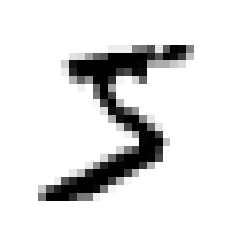

In [13]:
some_digit_image = some_digit.reshape(28, 28)

plt.imshow(some_digit_image, cmap=my_str.binary)
plt.axis('off')
plt.show()

In [14]:
y[0]

'5'

In [16]:
#تبدیل لیبل ها از متنی به عددی
import numpy as np
y = y.astype(np.uint8)

In [17]:
y[0]

5

In [18]:
#تست ست و ترین ست رو جدا میکنیم
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [23]:
#ُtraining a binary Classifier
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

In [24]:
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(random_state=42)

In [25]:
sgd_clf.predict([some_digit])

array([ True])

In [27]:
#performance measures
#measuring accuracy using cross-validation
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring=my_str.accuracy)

array([0.95035, 0.96035, 0.9604 ])

In [38]:
from sklearn.base import BaseEstimator

class NeverSClassifier(BaseEstimator):
    def fit(self, X, y=None):
        return self
    def predict(self, X):
        return np.zeros((len(X), 1),dtype=bool)

In [39]:
never_5_clf = NeverSClassifier()
cross_val_score(never_5_clf, X_train, y_train_5, cv=3, scoring=my_str.accuracy)

array([0.91125, 0.90855, 0.90915])

In [40]:
#confusion matrix
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)
y_train_pred

array([ True, False, False, ...,  True, False, False])

In [43]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_5, y_train_pred)

array([[53892,   687],
       [ 1891,  3530]])

In [45]:
y_train_perfect_predictions = y_train_5
confusion_matrix(y_train_5, y_train_perfect_predictions)

array([[54579,     0],
       [    0,  5421]])

In [46]:
#Precision and Recall
from sklearn.metrics import precision_score, recall_score
precision_score(y_train_5, y_train_pred)

0.8370879772350012

In [47]:
recall_score(y_train_5, y_train_pred)

0.6511713705958311

In [48]:
#F1
from sklearn.metrics import f1_score
f1_score(y_train_5, y_train_pred)

0.7325171197343846

In [49]:
#precision/recall trade-off
y_scores = sgd_clf.decision_function([some_digit])
y_scores

array([2164.22030239])

In [54]:
threshold = 0
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([ True])

In [55]:
threshold = 8000
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([False])

In [58]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3, method=my_str.decision_function)
y_scores

array([  1200.93051237, -26883.79202424, -33072.03475406, ...,
        13272.12718981,  -7258.47203373, -16877.50840447])

In [59]:
from sklearn.metrics import precision_recall_curve
precision, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

In [65]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], 'b--', label=my_str.Precision)
    plt.plot(thresholds, recalls[:-1], 'g-', label=my_str.Recall)

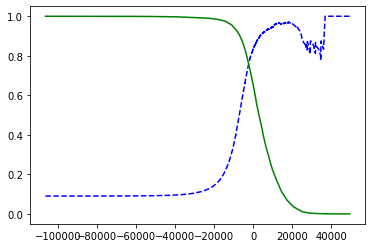

In [66]:
plot_precision_recall_vs_threshold(precision, recalls, thresholds)
plt.show()

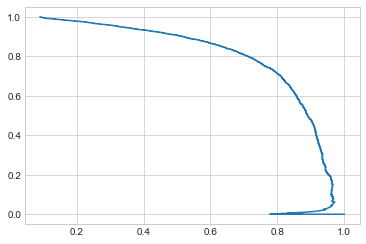

In [75]:
plt.style.use('seaborn-whitegrid')
fig = plt.figure()
ax = plt.axes()
ax.plot(precision, recalls)

In [79]:
threshold_90_precision = thresholds[np.argmax(precision >= 0.90)]
threshold_90_precision

3370.0194991439557

In [80]:
y_train_pred_90 = (y_scores >= threshold_90_precision)

In [81]:
precision_score(y_train_5, y_train_pred_90)

0.9000345901072293

In [82]:
recall_score(y_train_5, y_train_pred_90)

0.4799852425751706